In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk
import seaborn as sns


In [50]:
file_path = 'StudentsPerformance_modified.csv'
df = pd.read_csv(file_path)

In [52]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [53]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [54]:
df.skew(numeric_only = True)


reading score    -0.814504
writing score    11.450280
dtype: float64

In [55]:
null_count = df.isnull().sum()
display(null_count)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [56]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
null_rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,NaN,32.0,28.0
18,male,group C,master's degree,free/reduced,completed,NaN,22.0,46.0
19,female,group C,associate's degree,free/reduced,none,NaN,22.0,61.0
20,male,group D,high school,standard,none,NaN,12.0,63.0
21,female,group B,some college,free/reduced,completed,NaN,12.0,70.0
22,male,group D,some college,standard,none,NaN,13.0,53.0
23,female,group C,some high school,standard,none,NaN,14.0,NaN
28,male,group C,high school,standard,none,70,4.0,NaN
34,male,group E,some college,standard,none,NaN,11.0,82.0
38,female,group D,associate's degree,free/reduced,completed,75,NaN,88.0


In [57]:
null_rows.shape

(22, 8)

In [58]:
df["reading score"] = df["reading score"].fillna(0)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


(array([ 14.,   9.,  10.,  19.,  62., 161., 228., 253., 166.,  78.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

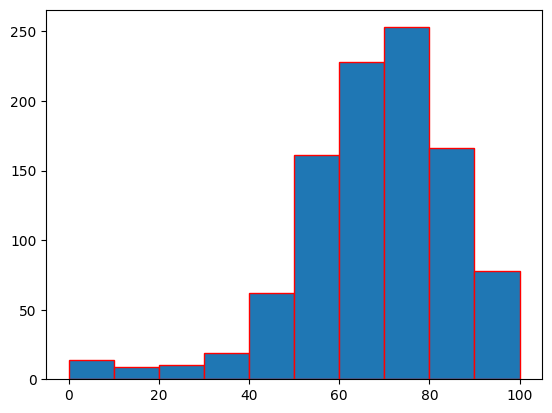

In [59]:
hist1=plt.hist(df["reading score"],edgecolor='red')
display(hist1)

(array([402., 586.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.]),
 array([ 10. ,  65.7, 121.4, 177.1, 232.8, 288.5, 344.2, 399.9, 455.6,
        511.3, 567. ]),
 <BarContainer object of 10 artists>)

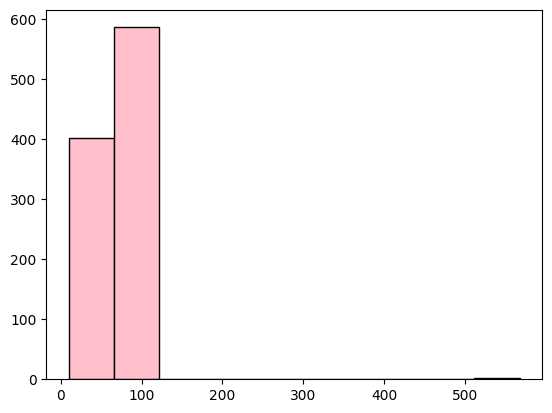

In [60]:
hist2 = plt.hist(df["writing score"],color='pink',edgecolor ='black')
display(hist2)

In [61]:
df["writing score"].describe()

count    991.000000
mean      69.487386
std       29.563757
min       10.000000
25%       57.000000
50%       69.000000
75%       79.000000
max      567.000000
Name: writing score, dtype: float64

<Axes: ylabel='writing score'>

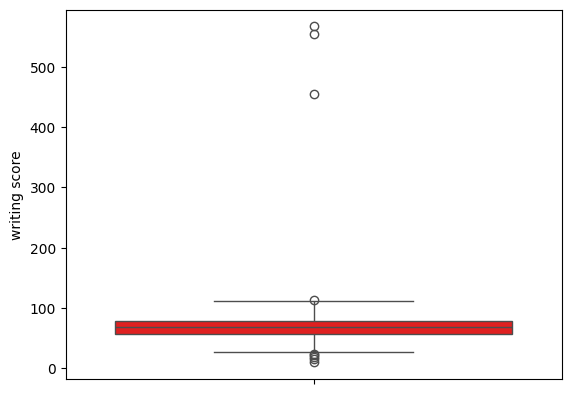

In [62]:
#detecting outlier for writing score using boxplot
sns.boxplot(df["writing score"],color='red')

In [63]:
#IQR to handle outliers
Q3 = df['writing score'].quantile(0.75)
Q1 = df['writing score'].quantile(0.25)
IQR= Q3-Q1

outliers = df[(df['writing score']< Q1-1.5*IQR)|(df['writing score']>Q3+1.5*IQR)]

new_df = df.drop(outliers.index)
display(new_df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


<Axes: ylabel='writing score'>

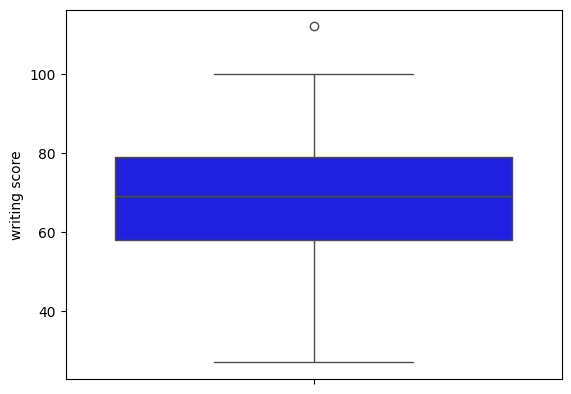

In [64]:
#checking for outliers after handling them
sns.boxplot(new_df["writing score"],color ='blue')

In [65]:
mean = df['reading score'].mean()
df['reading score'].fillna(mean)
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


<Axes: ylabel='reading score'>

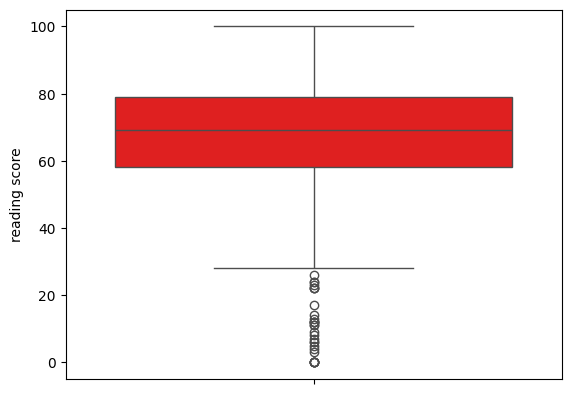

In [66]:
#detecting outlier for reading score using boxplot
sns.boxplot(df['reading score'],color='red')

In [67]:
#IQR to handle outliers
Q3 = df['reading score'].quantile(0.75)
Q1 = df['reading score'].quantile(0.25)
IQR= Q3-Q1

outliers = df[(df['reading score']< Q1-1.5*IQR)|(df['reading score']>Q3+1.5*IQR)]

new_df1 = df.drop(outliers.index)
display(new_df1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


<Axes: ylabel='reading score'>

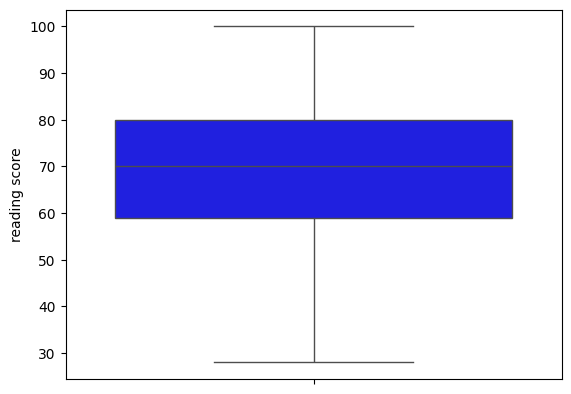

In [68]:
#checking for outliers after handling them
sns.boxplot(new_df1['reading score'],color='blue')

In [69]:
#checking datatypes
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [70]:
#changing math score from object to numeric
df['math score']=pd.to_numeric(df['math score'],errors='coerce')
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [71]:
#filling all NaN values with mean values
mean = df['math score'].mean()
df['math score'].fillna(mean)


0      72.0
1      69.0
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64

<Axes: ylabel='math score'>

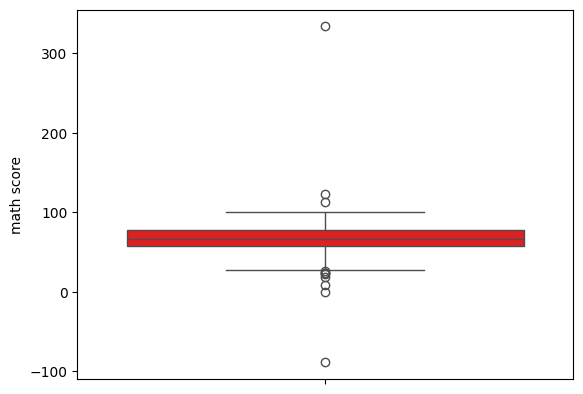

In [72]:
#detecting outlier for math score using boxplot
sns.boxplot(df['math score'],color='red')

In [73]:
#IQR to handle outliers
Q3 = df['math score'].quantile(0.75)
Q1 = df['math score'].quantile(0.25)
IQR= Q3-Q1

outliers = df[(df['math score']<Q1-1.5*IQR)|(df['reading score']>Q3+1.5*IQR)]

new_df1 = df.drop(outliers.index)
display(new_df1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


<Axes: ylabel='math score'>

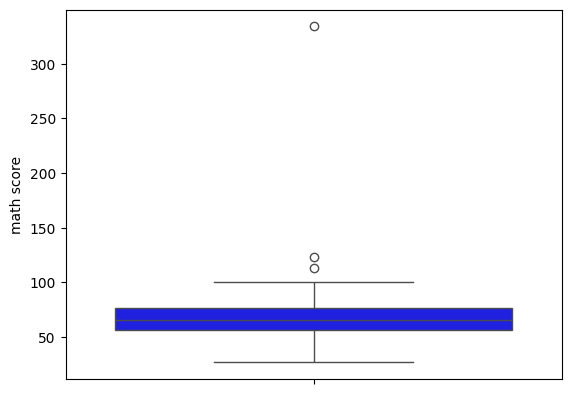

In [74]:
#checking for outliers after handling them
sns.boxplot(new_df1['math score'],color='blue')

In [75]:
#maximum absolute scaling normalization
#c=c/c.abs().max()
datamaxscaled = df.copy()
datamaxscaled['math score']=datamaxscaled['math score']/datamaxscaled['math score'].abs().max()
datamaxscaled['reading score']=datamaxscaled['reading score']/datamaxscaled['reading score'].abs().max()
datamaxscaled['writing score']=datamaxscaled['writing score']/datamaxscaled['writing score'].abs().max()
display(datamaxscaled)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.215569,0.72,0.130511
1,female,group C,some college,standard,completed,0.206587,0.90,0.155203
2,female,group B,master's degree,standard,none,0.269461,0.95,0.164021
3,male,group A,associate's degree,free/reduced,none,0.140719,0.57,0.077601
4,male,group C,some college,standard,none,0.227545,0.78,0.132275
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.263473,0.99,0.167549
996,male,group C,high school,free/reduced,none,0.185629,0.55,0.097002
997,female,group C,high school,free/reduced,completed,0.176647,0.71,0.114638
998,female,group D,some college,standard,completed,0.203593,0.78,0.135802


<Axes: >

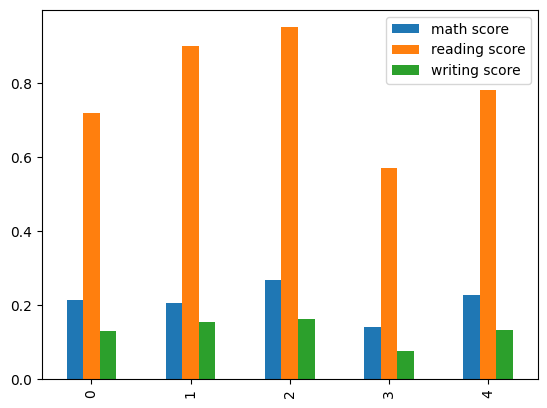

In [76]:
datamaxscaled.head(5).plot(kind = 'bar')

In [77]:
#the min-max feauture scaling
#c=(c-c.min())/(c.max()-c.min())
dataminmaxscl = df.copy()


dataminmaxscl['math score']= (dataminmaxscl['math score']-dataminmaxscl['math score'].min())/(dataminmaxscl['math score'].max()-dataminmaxscl['math score'].min())
dataminmaxscl['reading score']= (dataminmaxscl['reading score']-dataminmaxscl['reading score'].min())/(dataminmaxscl['reading score'].max()-dataminmaxscl['reading score'].min())
dataminmaxscl['writing score']= (dataminmaxscl['writing score']-dataminmaxscl['writing score'].min())/(dataminmaxscl['writing score'].max()-dataminmaxscl['writing score'].min())
display(dataminmaxscl)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.380615,0.72,0.114901
1,female,group C,some college,standard,completed,0.373522,0.90,0.140036
2,female,group B,master's degree,standard,none,0.423168,0.95,0.149013
3,male,group A,associate's degree,free/reduced,none,0.321513,0.57,0.061041
4,male,group C,some college,standard,none,0.390071,0.78,0.116697
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.418440,0.99,0.152603
996,male,group C,high school,free/reduced,none,0.356974,0.55,0.080790
997,female,group C,high school,free/reduced,completed,0.349882,0.71,0.098743
998,female,group D,some college,standard,completed,0.371158,0.78,0.120287


<Axes: >

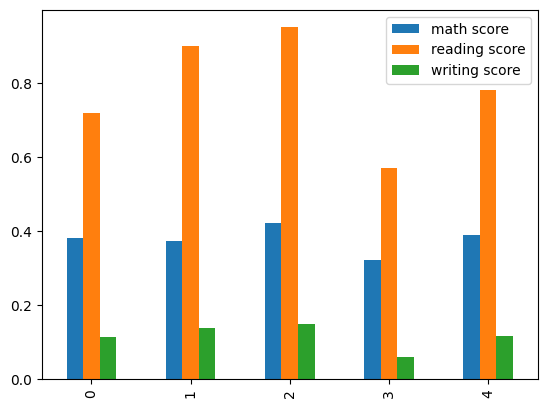

In [78]:
dataminmaxscl.head(5).plot(kind='bar')

In [79]:
#normalization using z score
#c=(c-c.mean())/c.std()
datazscaled = df.copy()
datazscaled['math score'] = (datazscaled['math score']-datazscaled['math score'].mean())/datazscaled['math score'].std()
datazscaled['reading score'] = (datazscaled['reading score']-datazscaled['reading score'].mean())/datazscaled['reading score'].std()
datazscaled['writing score'] = (datazscaled['writing score']-datazscaled['writing score'].mean())/datazscaled['writing score'].std()
display(datazscaled)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.310505,0.253363,0.152640
1,female,group C,some college,standard,completed,0.146392,1.289848,0.626193
2,female,group B,master's degree,standard,none,1.295181,1.577760,0.795319
3,male,group A,associate's degree,free/reduced,none,-1.057101,-0.610374,-0.862116
4,male,group C,some college,standard,none,0.529322,0.598858,0.186465
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.185773,1.808090,0.862969
996,male,group C,high school,free/reduced,none,-0.236537,-0.725539,-0.490039
997,female,group C,high school,free/reduced,completed,-0.400650,0.195780,-0.151787
998,female,group D,some college,standard,completed,0.091688,0.598858,0.254116


<Axes: >

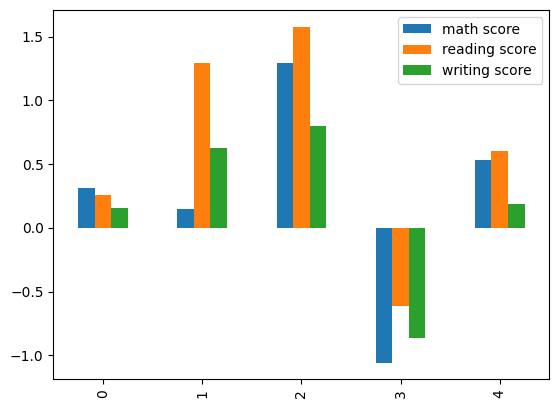

In [81]:
datazscaled.head(5).plot(kind = 'bar')